In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
pd.options.mode.chained_assignment = None
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
vino = pd.read_csv('winequalityN.csv')

In [3]:
vino_rojo = vino[vino['type']=='red']
vino_blanco = vino[vino['type']=='white']

vino_rojo.shape,vino_blanco.shape

((1599, 13), (4898, 13))

In [4]:
#limpiando datos del vino rojo
media = vino_rojo["fixed acidity"].mean()
vino_rojo["fixed acidity"].fillna(media,inplace=True)


media2 = vino_rojo["volatile acidity"].mean()
vino_rojo["volatile acidity"].fillna(media2,inplace=True)


media3 = vino_rojo["citric acid"].mean()
vino_rojo["citric acid"].fillna(media3,inplace=True)


media4 = vino_rojo["pH"].mean()
vino_rojo["pH"].fillna(media4,inplace=True)


media5 = vino_rojo["sulphates"].mean()
vino_rojo["sulphates"].fillna(media5,inplace=True)



In [5]:
vino_rojo

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.560000,9.4,5
4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.680000,9.8,5
4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.650000,9.8,5
4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.580000,9.8,6
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.560000,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.658078,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [6]:
#limpiando datos del vino blanco
media = vino_blanco["fixed acidity"].mean()
vino_blanco["fixed acidity"].fillna(media,inplace=True)


media2 = vino_blanco["volatile acidity"].mean()
vino_blanco["volatile acidity"].fillna(media2,inplace=True)


media3 = vino_blanco["citric acid"].mean()
vino_blanco["citric acid"].fillna(media3,inplace=True)


media4 = vino_blanco["residual sugar"].mean()
vino_blanco["residual sugar"].fillna(media4,inplace=True)


media5 = vino_blanco["chlorides"].mean()
vino_blanco["chlorides"].fillna(media5,inplace=True)


media6 = vino_blanco["pH"].mean()
vino_blanco["pH"].fillna(media6,inplace=True)


media7 = vino_blanco["sulphates"].mean()
vino_blanco["sulphates"].fillna(media7,inplace=True)

In [7]:
vino_blanco

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270000,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300000,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280000,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230000,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230000,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.210000,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.320000,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.278252,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.290000,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [8]:
#vino blanco
posiciones = []
vino_blanco2 = vino_blanco.drop('type', axis=1)

for columna in vino_blanco2:
    quantile1 = np.quantile(vino_blanco[columna],0.25)
    quantile3 =  np.quantile(vino_blanco[columna],0.75)
    inter_range = quantile3 - quantile1

    lowerb = quantile1 - (1.5*inter_range)
    upperb = quantile3 + (1.5*inter_range)
    
    posiciones.extend(vino_blanco.index[(vino_blanco[columna] < lowerb) | (vino_blanco[columna] > upperb)])

vino_blanco_limpio = vino_blanco.drop(posiciones)
vino_blanco_limpio.shape


(3858, 13)

In [9]:
#vino rojo
posiciones = []
vino_rojo2 = vino_rojo.drop('type', axis=1)

for columna in vino_rojo2:
    quantile1 = np.quantile(vino_rojo[columna],0.25)
    quantile3 =  np.quantile(vino_rojo[columna],0.75)
    inter_range = quantile3 - quantile1

    lowerb = quantile1 - (1.5*inter_range)
    upperb = quantile3 + (1.5*inter_range)
    
    posiciones.extend(vino_rojo.index[(vino_rojo[columna] < lowerb) | (vino_rojo[columna] > upperb)])

vino_rojo_limpio = vino_rojo.drop(posiciones)
vino_rojo_limpio.shape

(1179, 13)

In [10]:
#StandardScaler en vino rojo
vino_rojo_sin_type = vino_rojo_limpio.drop('type',axis=1)
vino_rojo_columnas = vino_rojo_sin_type.columns
ss = StandardScaler()
vino_rojo_escala = pd.DataFrame(ss.fit_transform(vino_rojo_sin_type),columns=list(vino_rojo_columnas))
vino_rojo_escala.shape

(1179, 12)

In [11]:
#StandardScaler en vino blanco
vino_blanco_sin_type = vino_blanco_limpio.drop('type',axis=1)
vino_blanco_columnas = vino_blanco_sin_type .columns
ss = StandardScaler()
vino_blanco_escala = pd.DataFrame(ss.fit_transform(vino_blanco_sin_type ),columns=list(vino_blanco_columnas))
vino_blanco_escala.shape

(3858, 12)

In [12]:
#pca en vino blanco
pca = PCA(n_components=5)
pca.fit(vino_blanco_escala)
vino_blanco_pca = pca.transform(vino_blanco_escala)
vino_blanco_pca = pd.DataFrame(vino_blanco_pca,columns = ['c1','c2','c3','c4','c5'])
vino_blanco_pca.shape

(3858, 5)

In [13]:
#pca en vino rojo
pca = PCA(n_components=5)
pca.fit(vino_rojo_escala)
vino_rojo_pca = pca.transform(vino_rojo_escala)
vino_rojo_pca = pd.DataFrame(vino_rojo_pca,columns =['c1','c2','c3','c4','c5'])
vino_rojo_pca.shape

(1179, 5)

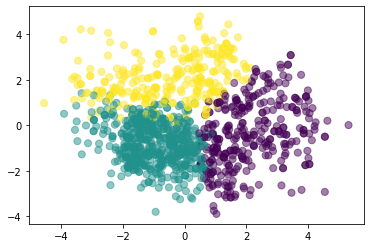

In [14]:
#vino rojo
kmean = KMeans(n_clusters=3)
kmean.fit(vino_rojo_pca)
plt.scatter(vino_rojo_pca['c1'],vino_rojo_pca['c2'],c=kmean.labels_.astype(float), s=50,alpha=0.5)
plt.show()

## conclusiones vino rojo

In [14]:
En conclusion segun lo observado en esta grafica los perfiles no son muy similares por eso están dispersos.

In [15]:
vino_rojo_limpio['clusters'] = kmean.labels_
vino_rojo_limpio

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters
4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.560000,9.4,5,1
4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.680000,9.8,5,1
4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.650000,9.8,5,1
4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.580000,9.8,6,0
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.560000,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,1
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.658078,11.2,6,2
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,2
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,1


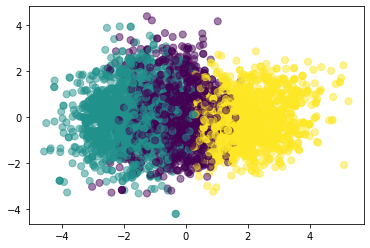

In [16]:
#vino blanco
kmean = KMeans(n_clusters=3)
kmean.fit(vino_blanco_pca)
plt.scatter(vino_blanco_pca['c1'],vino_blanco_pca['c2'],c=kmean.labels_.astype(float), s=50,alpha=0.5)
plt.show()

## conclusiones sobre vino blanco

In [ ]:
En conclusion en esta segunda grafica los perfiles comparten atributos parecidos por eso están más juntos.

In [17]:
vino_blanco_limpio['clusters'] = kmean.labels_
vino_blanco_limpio

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters
0,white,7.0,0.270000,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,2
1,white,6.3,0.300000,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,white,8.1,0.280000,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,white,7.2,0.230000,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
4,white,7.2,0.230000,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.210000,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,white,6.6,0.320000,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,2
4895,white,6.5,0.278252,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,white,5.5,0.290000,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [18]:
vino_blanco_limpio['variable_respuesta'] =  vino_blanco_limpio.apply(lambda r: 1 if r['quality']>=5 else 0,axis=1)

In [19]:
vino_rojo_limpio['variable_respuesta'] =  vino_rojo_limpio.apply(lambda r: 1 if r['quality']>=5 else 0,axis=1)

In [20]:
#vino rojo
x_vino_rojo = vino_rojo_limpio.drop(['quality','type'], axis=1).values
y_vino_rojo = vino_rojo_limpio['quality'].values

x_train_vino_rojo, x_test_vino_rojo, y_train_vino_rojo,y_test_vino_rojo = train_test_split(x_vino_rojo, y_vino_rojo,test_size=0.25,random_state=0)

In [21]:
# Regresión logistica vino rojo
lmodel = LogisticRegression(max_iter=10000)
lmodel.fit(x_train_vino_rojo, y_train_vino_rojo)
y_pre = lmodel.predict(x_test_vino_rojo)
print('porcentaje: ',accuracy_score(y_test_vino_rojo,y_pre)*100)

porcentaje:  65.42372881355932


In [22]:

x_vino_blanco = vino_blanco_limpio.drop(['quality','type'], axis=1).values
y_vino_blanco = vino_blanco_limpio['quality'].values

x_train_vino_blanco, x_test_vino_blanco, y_train_vino_blanco,y_test_vino_blanco = train_test_split(x_vino_blanco, y_vino_blanco,test_size=0.25,random_state=0)

In [23]:
# Regresión logistica vino blanco
lmodel = LogisticRegression(max_iter=10000)
lmodel.fit(x_train_vino_blanco, y_train_vino_blanco)
y_pre = lmodel.predict(x_test_vino_blanco)
print('porcentaje : ',accuracy_score(y_test_vino_blanco,y_pre)*100)

porcentaje :  54.61139896373057


In [24]:
# redes, vino blanco
nn = MLPClassifier(random_state=1, max_iter=3000)
nn.fit(x_train_vino_blanco, y_train_vino_blanco)
y_pre = nn.predict(x_test_vino_blanco)
print('porcentaje: ',accuracy_score(y_test_vino_blanco,y_pre)*100)


porcentaje:  50.05181347150259


In [25]:
# redes, vino rojo
nn = MLPClassifier(random_state=1, max_iter=3000)
nn.fit(x_train_vino_rojo, y_train_vino_rojo)
y_pre = nn.predict(x_test_vino_rojo)
print('porcentaje: ',accuracy_score(y_test_vino_rojo,y_pre)*100)


porcentaje:  66.10169491525424


In [26]:
#árboles, vino blanco
tree_decision = DecisionTreeClassifier(random_state=1)
tree_decision.fit(x_train_vino_blanco, y_train_vino_blanco)
y_pre = tree_decision.predict(x_test_vino_blanco)
print('porcentaje: ', accuracy_score(y_test_vino_blanco,y_pre)*100)


porcentaje:  65.07772020725389


In [27]:
#árboles, vino rojo
tree_decision  = DecisionTreeClassifier(random_state=1)
tree_decision.fit( x_train_vino_rojo, y_train_vino_rojo)
y_pre = tree_decision.predict(x_test_vino_rojo)
print('porcentaje: ',accuracy_score(y_test_vino_rojo,y_pre)*100)


porcentaje:  69.83050847457626


In [28]:
#bosques, vino rojo
random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)
random_forest.fit(x_train_vino_rojo, y_train_vino_rojo)
y_pre = random_forest.predict(x_test_vino_rojo)>=5
print('porcentaje: ',accuracy_score(y_test_vino_rojo,y_pre)*100)

porcentaje:  0.0


In [29]:
#bosques, vino blanco
random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)
random_forest.fit(x_train_vino_blanco, y_train_vino_blanco)
y_pre = random_forest.predict(x_test_vino_rojo)>=5
print('porcentaje: ',accuracy_score(y_test_vino_rojo,y_pre)*100)

porcentaje:  0.0


### Análisis

In [29]:
En conclusion final la regresión logística y árboles de decisiones son los que dieron los mejores puntajes.